In [156]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
data = pd.read_csv("winequality-red.csv") # importing dataset

In [158]:
data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


which features are higly correlated with dependent feature (quality), we can verify by correlation.

In [159]:
# observing correlation between each feature.
corr = data.corr() 
corr.style.background_gradient(cmap = "coolwarm")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


from the above visualization PH. Free sulpher dioxide and Residual Sugar has least correlation with output quality.

In [160]:
np.unique(data.quality) # printing unique features from the output quality

array([3, 4, 5, 6, 7, 8], dtype=int64)

To differentiate the wine quality i,e( low or high ), i am considering low quality with less that or equal to 5. And for high quality greater than or equal to 6.


So, Now I'm creating a new feature called "qlt", dentoing low quality as 0 and high quality as 1

In [161]:
data["qlt"] = data["quality"]

In [162]:
data_quality = data.qlt.values
for i in range(len(data["quality"])):
    if data_quality[i] <=5 :
        data_quality[i]=0
    else:
        data_quality[i]=1

In [163]:
qual = data.drop(data.columns[[-2]], axis=1,inplace=True) # droping quality feature 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qlt
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


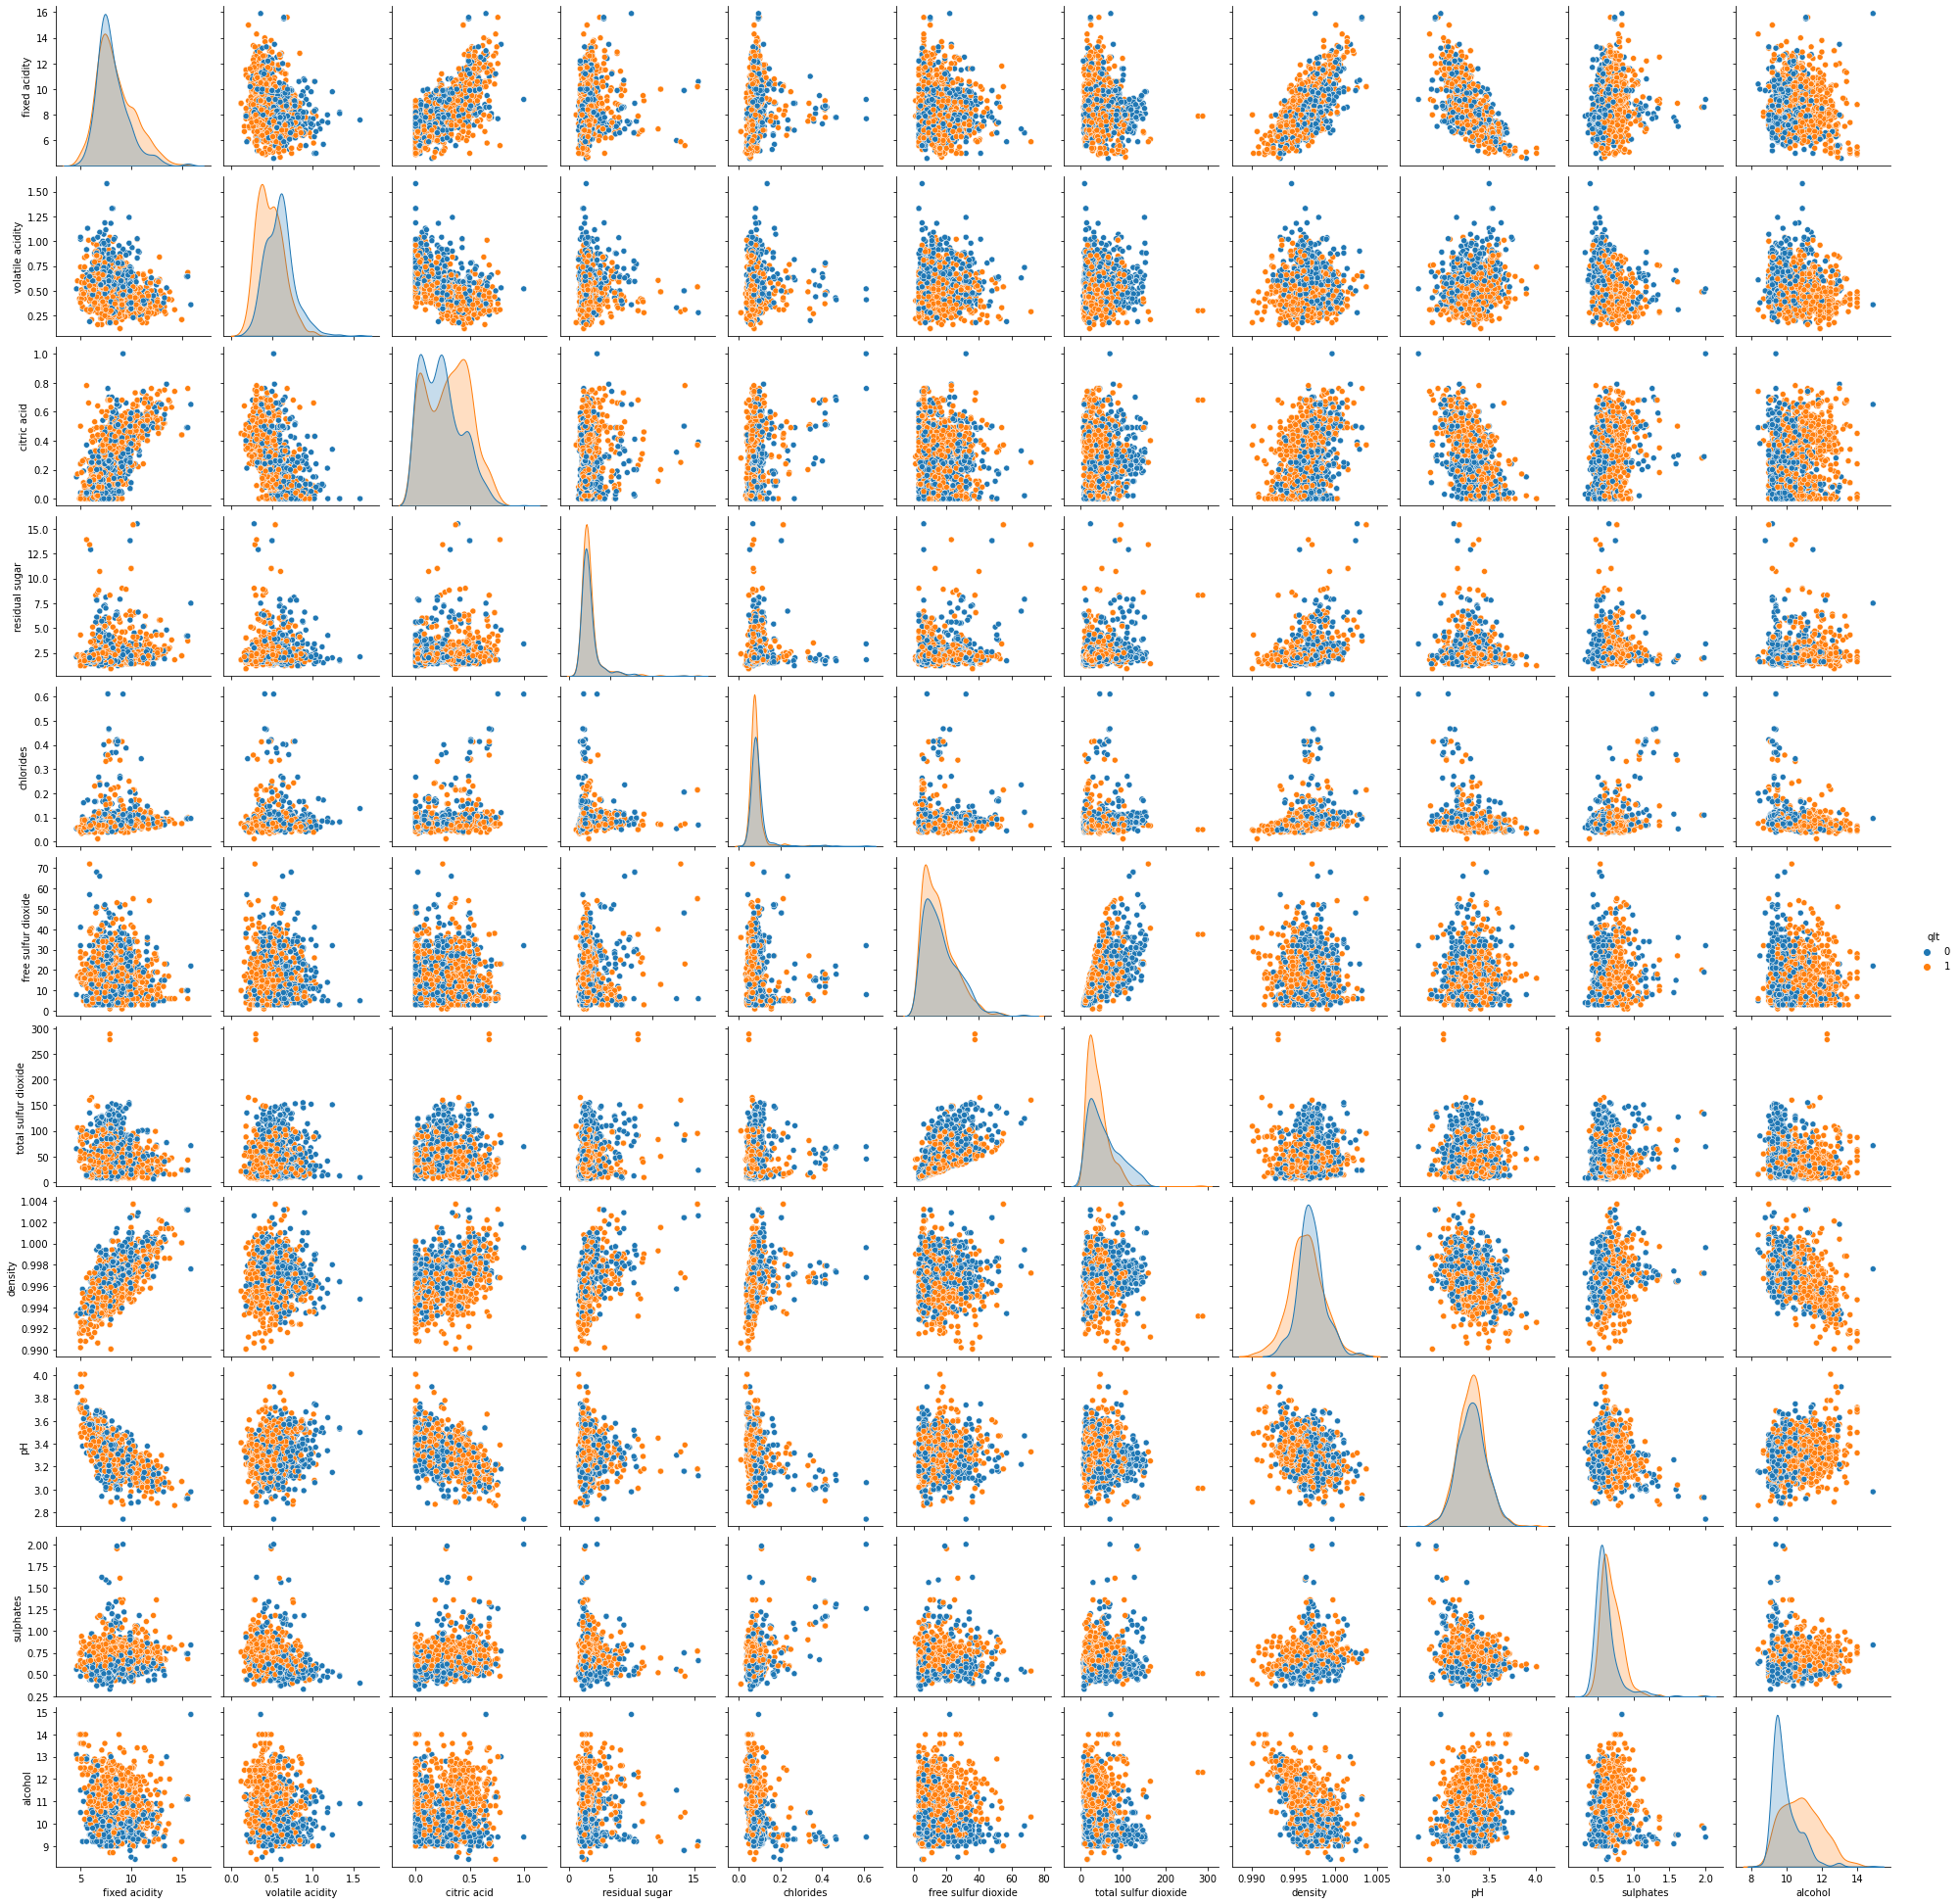

In [164]:
sns.pairplot(data,hue="qlt")

Here after creating new feature qlt with 2 categorical classes 0 or 1. the above pairplot shows the points of 2 features compared with all other features.

Now I'm creating an array of all independent values as "idp", and dependent values as "out"

In [165]:
idp = data.iloc[:, :-1].values
out = data.iloc[:, -1].values

Verifying the dataset whether having any null values.

In [166]:
data.isnull().sum() ## checking for null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
qlt                     0
dtype: int64

Got to know there are no Null values.

Now creating a regressor object from LogisticRegression class which was imported from sklearn library.

In [167]:
regressor = LogisticRegression(max_iter=1000) # creating an object named regressor

Splitting dataset in to 2 parts training and testing. 

splitted training dataset as 80% and testing dataset as 20%.
(By keeping parameter test_size =0.2 it creates test size as 20% and remaining 80% as training dataset)

In [168]:
x_train, x_test, y_train, y_test = train_test_split(idp, out, test_size = 0.2, random_state=0) 
# splitted data into training and testing. with 80:20 ratio

In [169]:
regressor.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Creating a function called quality to predict the test data. And stores results in an array.

In [170]:
def quality(data):
    manual_pred=[]
    for i in range(len(data)):
        predict1 = 1/(1+np.exp(-(np.dot(regressor.coef_, data[i]) + regressor.intercept_)))
        if predict1 <= 0.47:   ## Setting threshold as 0.47 for better accuracy.
            manual_pred.append(0)
        else:
            manual_pred.append(1)
    return np.array(manual_pred)

To find the accuracy, I'm using confusion matrix 

Accuracy = (TP + TN) / (TP + TN + FP + FN) 

Finding Accuracy for Test/ Validate Data.

In [171]:
conf_mtx = confusion_matrix(quality(x_test), y_test) # finding Tp Tn Fp Fn values for test data with confusion matrix.
conf_mtx

array([[107,  32],
       [ 41, 140]], dtype=int64)

In [172]:
print("The accuracy of the model on vadidation data is :",((conf_mtx[0][0] + conf_mtx[1][1])/ np.sum(conf_mtx)) * 100,"%")

The accuracy of the model on vadidation data is : 77.1875 %


............................................................................................................................




Finding Accuracy for Training Data.

In [173]:
conf_mtx_train = confusion_matrix(quality(x_train),y_train) # finding Tp Tn Fp Fn values for training data with confusion matrix.
conf_mtx_train

array([[428, 151],
       [168, 532]], dtype=int64)

In [174]:
print("The accuracy of the model on training data is :",((conf_mtx_train[0][0] + conf_mtx_train[1][1])/ np.sum(conf_mtx_train)) * 100,"%")

The accuracy of the model on training data is : 75.05863956215794 %


As we got Accuracy of test data and train data. Test Data Accuracy = 77.18%, Train Data Accuracy = 75.05%.
 
 We conclude that 
 
 1) The above created model which has "LOW BIAS" and "LOW VARIENCE".
 
 2) the model we build was not under fitted or over fitted.